AttributeError: Text.set() got an unexpected keyword argument 'annot_kws'

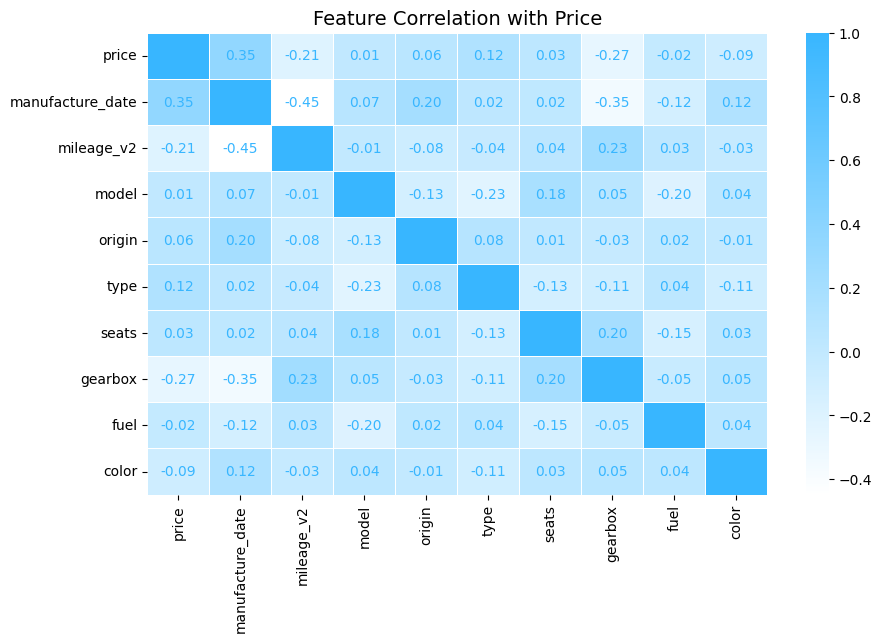

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder

# Load file CSV
df = pd.read_csv("cleaned_data_f.csv")

# Chọn các cột liên quan
df_corr = df[[ "price","manufacture_date", "mileage_v2","model","origin", "type", "seats", "gearbox", "fuel", "color"]].copy()
df_corr.dropna(inplace=True)


# Label Encoding cho các cột dạng string
for col in ["model","origin", "type", "gearbox", "fuel", "color"]:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Tạo custom colormap: trắng (cao) → xanh #38b6ff (thấp)
custom_cmap = LinearSegmentedColormap.from_list("white_to_blue", ["#ffffff", "#38b6ff"])

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap=custom_cmap,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"color": "#38b6ff"}  # màu chữ
)
plt.title("Feature Correlation with Price", fontsize=14, color="#38b6ff6")
plt.xticks(color="#38b6ff", rotation=45)
plt.yticks(color="#38b6ff", rotation=0)
plt.tight_layout()
plt.show()
